# 1. Exploratory Data Analysis of Financial News

In [1]:
# Import the dependencies used in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# nltk for text cleaning
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Format numbers in DataFrames to have two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the initial data file into a DataFrame and preview
news = pd.read_csv("Data/article-data.csv", encoding="ISO-8859-1")
news

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


### 1.1 Exploring the Data

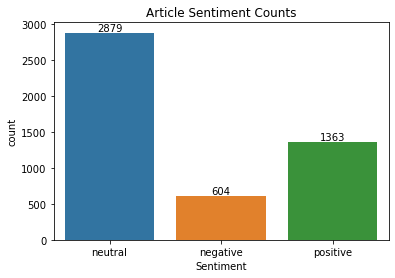

In [2]:
# Chart the different types of sentiment captured
ax = sns.countplot(x = news["Sentiment"])
ax.bar_label(ax.containers[0])
ax.set(title="Article Sentiment Counts")
plt.savefig("Images/Article Sentiment Counts.png")
plt.show()

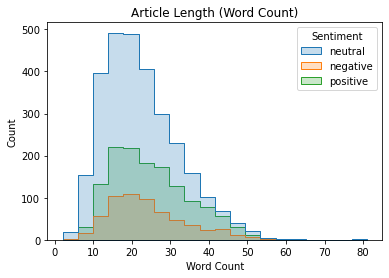

The average article is 23 words long.
The median article is 21 words long.


In [3]:
# Create a new column for the word count
news["Word Count"] = news["Text"].str.split().str.len()

# Plot a histogram to show the word count distribution
sns.histplot(data = news, x = "Word Count", bins=20, hue = "Sentiment", element = "step").set(title="Article Length (Word Count)")
plt.savefig("Images/Article Word Count Length.png")
plt.show()

# Print the average and median word count
print(f'The average article is {news["Word Count"].mean():.0f} words long.')
print(f'The median article is {news["Word Count"].median():.0f} words long.')

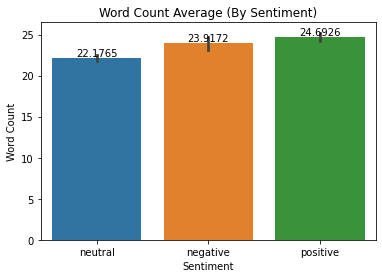

In [4]:
# Chart the average word length for each sentiment
ax = sns.barplot(data = news, x = "Sentiment", y = "Word Count")
ax.bar_label(ax.containers[0])
ax.set(title="Word Count Average (By Sentiment)")
plt.savefig("Images/Average Sentiment Word Count.png")
plt.show()

### 1.2 Text Cleaning

In [5]:
# Shuffle the dataset to ensure articles are randomised
shuffled_news = news.sample(frac = 1)
shuffled_news

,Sentiment,Text,Word Count
3355,neutral,The sellers were EOSS Innovationsmanagement an...,12
1041,neutral,"He does not believe , however , that HKScan or...",24
4256,neutral,"The gross area of eight houses will be 12,167 ...",11
4281,neutral,The utility will also provide services related...,21
3420,neutral,This amount will not be included in the pensio...,11
...,...,...,...
1721,positive,Proving that good cellphone design is truly a ...,29
1307,positive,"Our strong company brands - ESL Shipping , Lei...",24
2757,neutral,Swedish engineering consultant firm Etteplan i...,23
323,positive,Commission income rose by 25.7 % to EUR 16.1 m...,17


In [6]:
# create the values for the text cleaning
ps = WordNetLemmatizer()
stopwords = stopwords.words("english")

# Update the wordnet package
# nltk.download("wordnet")

In [7]:
# Define a funtion to clean the text
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatise the word and remove stop words like a, an , the , is ,are ...
    new_text = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleaned_news = ' '.join(new_text) 
    
    # return cleanned data
    return cleaned_news

In [8]:
# Run the function through the article text column
cleaned_news = shuffled_news
cleaned_news["Text"] = cleaned_news["Text"].apply(lambda x : cleaning_data(x))
cleaned_news

,Sentiment,Text,Word Count
3355,neutral,seller eos innovationsmanagement group private...,12
1041,neutral,believe however hkscan atrium start use import...,24
4256,neutral,gross area eight house,11
4281,neutral,utility also provide service related electrici...,21
3420,neutral,amount included pensionable salary,11
...,...,...,...
1721,positive,proving good cellphone design truly work art w...,29
1307,positive,strong company brand esl shipping leipurin tel...,24
2757,neutral,swedish engineering consultant firm etteplan e...,23
323,positive,commission income rose eur mn eur mn,17


In [9]:
# drop any blank rows that the lemmatiser created (more than likely articles with irrelevant content)
cleaned_news = cleaned_news.replace(r'^s*$', float('NaN'), regex = True)
cleaned_news.dropna(inplace = True) 
cleaned_news.shape

(4845, 3)

In [10]:
# export final cleaned data file to a csv
cleaned_news.to_csv("Data/cleaned-news.csv", index = False)

In [11]:
# Split the data into positive, neutral and negative data
positive = cleaned_news[(cleaned_news.Sentiment == "positive")]
positive = pd.DataFrame(positive["Text"])

neutral = cleaned_news[(cleaned_news.Sentiment == "neutral")]
neutral = pd.DataFrame(neutral["Text"])

negative = cleaned_news[(cleaned_news.Sentiment == "negative")]
negative = pd.DataFrame(negative["Text"])

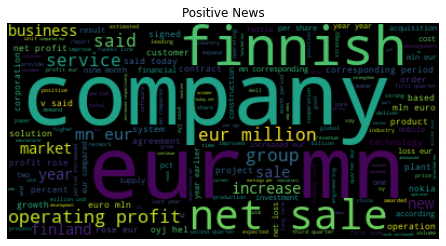

In [12]:
# Positive wordcloud
text = " ".join(review for review in positive.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive News")
plt.savefig('Images/Positive Cloud.png')
plt.show()

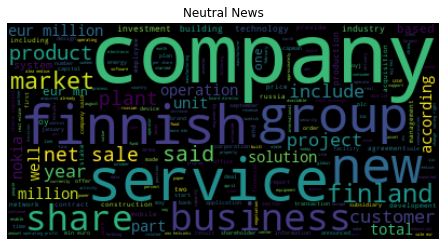

In [13]:
# Neutral wordcloud
text = " ".join(review for review in neutral.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Neutral News")
plt.savefig('Images/Neutral Cloud.png')
plt.show()

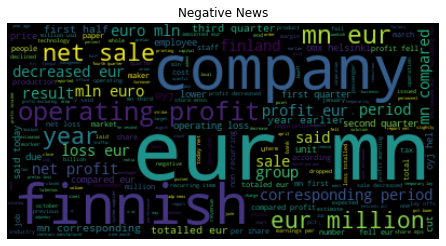

In [14]:
# Negative wordcloud
text = " ".join(review for review in negative.Text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative News")
plt.savefig('Images/Negative Cloud.png')
plt.show()